In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import category_encoders as ce

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
df=pd.read_csv('home-credit-default-risk/application_train.csv')

In [5]:
#欠損値の総数の確認
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [6]:
#dfの形の確認
df.shape

(307511, 122)

In [7]:
#欠損値を中央値で埋める
df_fna=df.fillna(df.median())

In [8]:
#データを従属変数(y)と独立変数(X)に分ける
X = df_fna[[col for col in df_fna.columns if col != 'TARGET']]
y = df_fna.TARGET

In [9]:
#数値データではない変数の確認
df.dtypes == 'object'

SK_ID_CURR                      False
TARGET                          False
NAME_CONTRACT_TYPE               True
CODE_GENDER                      True
FLAG_OWN_CAR                     True
FLAG_OWN_REALTY                  True
CNT_CHILDREN                    False
AMT_INCOME_TOTAL                False
AMT_CREDIT                      False
AMT_ANNUITY                     False
AMT_GOODS_PRICE                 False
NAME_TYPE_SUITE                  True
NAME_INCOME_TYPE                 True
NAME_EDUCATION_TYPE              True
NAME_FAMILY_STATUS               True
NAME_HOUSING_TYPE                True
REGION_POPULATION_RELATIVE      False
DAYS_BIRTH                      False
DAYS_EMPLOYED                   False
DAYS_REGISTRATION               False
DAYS_ID_PUBLISH                 False
OWN_CAR_AGE                     False
FLAG_MOBIL                      False
FLAG_EMP_PHONE                  False
FLAG_WORK_PHONE                 False
FLAG_CONT_MOBILE                False
FLAG_PHONE  

In [10]:
#数値データではないカラムの抽出
df.columns[df.dtypes == 'object'].shape
df_col=df.columns[df.dtypes == 'object']

In [11]:
df_col

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [12]:
#エンコーディングを行う
df_ce = ce.OneHotEncoder(cols=df_col)

In [13]:
df_cef=df_ce.fit_transform(X)

In [14]:
#標準化を行う
SS=StandardScaler()
SS.fit(df_cef)
X_scaled=SS.transform(df_cef)

In [15]:
#X, yを訓練とテストに分ける
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=2019, test_size=0.2, stratify=y)

In [16]:
#ロジスティック回帰を行う
logreg = LogisticRegression()

In [17]:
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#学習モデルを使って予測値を出力
pred = logreg.predict_proba(X_test)[: , 1]

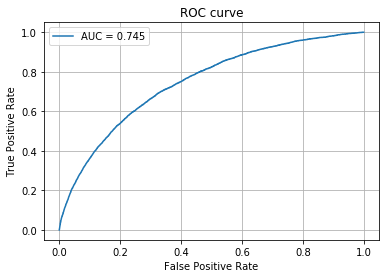

In [19]:
#ROC曲線を描く
fpr, tpr, thresholds = roc_curve(y_test, pred) 
auc_score = roc_auc_score(y_test, pred) 
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score)) 
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [20]:
#テストファイルの読み込み
df_test=pd.read_csv('home-credit-default-risk/application_test.csv')

In [21]:
#欠損値を訓練データの中央値で埋める
df_test_fna=df_test.fillna(df.median())

In [22]:
#エンコーディングを行う
df_test_cef=df_ce.transform(df_test_fna)

In [24]:
#訓練データの値を用いて標準化
X_test_scaled=SS.transform(df_test_cef)

In [40]:
#予測値の出力
test_preds=logreg.predict_proba(X_test_scaled)[:,1]
test_preds

array([0.05708767, 0.22989341, 0.04825094, ..., 0.04611165, 0.05702069,
       0.11397536])

In [41]:
#CSVファイルに出力
sub = pd.DataFrame({'SK_ID_CURR': df_test.SK_ID_CURR , 'TARGET': test_preds})

In [42]:
#CSVファイルに出力
sub.to_csv('submit.csv', index = False)

SCORE=0.73800

問3

In [44]:
#ファイルの読み込み
df=pd.read_csv('/Users/makitakohei/Desktop/D2C/第２回(6月15日)/home-credit-default-risk/application_train.csv')

In [45]:
#欠損値の割合を表示
df.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.float).apply(lambda col: col/col.sum(), axis=0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
False,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999961,0.999096,0.995799,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.340092,1.0,1.0,1.0,1.0,1.0,1.0,0.686545,0.999993,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.436189,0.997854,0.801747,0.492503,0.41484,0.51219,0.335022,0.301277,0.46704,0.496512,0.502392,0.321514,0.406233,0.31645,0.498067,0.30567,0.448208,0.492503,0.41484,0.51219,0.335022,0.301277,0.46704,0.496512,0.502392,0.321514,0.406233,0.31645,0.498067,0.30567,0.448208,0.492503,0.41484,0.51219,0.335022,0.301277,0.46704,0.496512,0.502392,0.321514,0.406233,0.31645,0.498067,0.30567,0.448208,0.316138,0.498239,0.517315,0.491592,0.526017,0.99668,0.99668,0.99668,0.99668,0.999997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.864984,0.864984,0.864984,0.864984,0.864984,0.864984
True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000039,0.000904,0.004201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.659908,0.0,0.0,0.0,0.0,0.0,0.0,0.313455,0.000007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.563811,0.002146,0.198253,0.507497,0.58516,0.48781,0.664978,0.698723,0.53296,0.503488,0.497608,0.678486,0.593767,0.68355,0.501933,0.69433,0.551792,0.507497,0.58516,0.48781,0.664978,0.698723,0.53296,0.503488,0.497608,0.678486,0.593767,0.68355,0.501933,0.69433,0.551792,0.507497,0.58516,0.48781,0.664978,0.698723,0.53296,0.503488,0.497608,0.678486,0.593767,0.68355,0.501933,0.69433,0.551792,0.683862,0.501761,0.482685,0.508408,0.473983,0.00332,0.00332,0.00332,0.00332,0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.135016,0.135016,0.135016,0.135016,0.135016,0.135016


特徴量選択として、50%以上欠損しているデータを削除して分析を行う

50％以上欠損しているもの

OWN_CAR_AGE\
EXT_SOURCE_1\
APARTMENTS_AVG\
BASEMENTAREA_AVG\
YEARS_BUILD_AVG\
COMMONAREA_AVG\
ELEVATORS_AVG\
ENTRANCES_AVG\
FLOORSMIN_AVG\
LANDAREA_AVG\
LIVINGAPARTMENTS_AVG\
LIVINGAREA_AVG\
NONLIVINGAPARTMENTS_AVG\
NONLIVINGAREA_AVG\
APARTMENTS_MODE\
BASEMENTAREA_MODE\
YEARS_BUILD_MODE\
COMMONAREA_MODE\
ELEVATORS_MODE\
ENTRANCES_MODE\
FLOORSMIN_MODE\
LANDAREA_MODE\
LIVINGAPARTMENTS_MODE\
LIVINGAREA_MODE\
NONLIVINGAPARTMENTS_MODE\
NONLIVINGAREA_MODE\
APARTMENTS_MEDI\
BASEMENTAREA_MEDI\
YEARS_BUILD_MEDI\
COMMONAREA_MEDI\
ELEVATORS_MEDI\
ENTRANCES_MEDI\
FLOORSMIN_MEDI\
LANDAREA_MEDI\
LIVINGAPARTMENTS_MEDI\
LIVINGAREA_MEDI\
NONLIVINGAPARTMENTS_MEDI\
NONLIVINGAREA_MEDI\
FONDKAPREMONT_MODE\
HOUSETYPE_MODE\
WALLSMATERIAL_MODE

In [46]:
#独立変数と従属変数に分ける。このとき、50%以上欠損データが含まれるカラムをデータに含めないようにする
X = df[[col for col in df.columns if col not in ['OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','TARGET']]]
y = df.TARGET

In [47]:
#残ったデータに関して、中央値で穴埋めする
X_fna=X.fillna(X.median())

In [48]:
#数値データ以外のものを抽出
X_fna.columns[X_fna.dtypes == 'object'].shape
X_fna_col=X_fna.columns[X_fna.dtypes == 'object']

In [49]:
#エンコーディングを行う
X_ce = ce.OneHotEncoder(cols=X_fna_col)

In [50]:
X_cef=X_ce.fit_transform(X_fna)

In [51]:
#標準化を行う
SS=StandardScaler()
SS.fit(X_cef)
X_scaled=SS.transform(X_cef)

In [52]:
#データを訓練とテストに分類
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=2019, test_size=0.2, stratify=y)

In [53]:
#ロジスティック回帰を行う
logreg = LogisticRegression()

In [54]:
logreg.fit(X_train, y_train)

/Users/makitakohei/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
#予測値の出力
pred = logreg.predict_proba(X_test)[: , 1]
pred

array([0.03973675, 0.10043529, 0.03230226, ..., 0.01686711, 0.04808849,
       0.1046301 ])

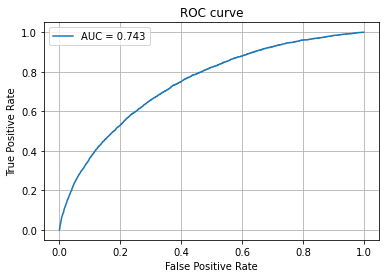

In [56]:
#ROC曲線を描く
fpr, tpr, thresholds = roc_curve(y_test, pred) 
auc_score = roc_auc_score(y_test, pred) 
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score)) 
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)